# Car Price Regression :)

Let's define the scope of this project:
- Bottom line is to most accurately build a model for prediction purposes
- Model first (obviously), prediction second
- Also, first we'll write it using built in Python libraries, then write from scratch. :)

We found this dataset from Kaggle [link](https://www.kaggle.com/goyalshalini93/car-price-prediction-linear-regression-rfe)

## Load in the Data

In order to load our data into a natively Python supported dataframe mimicking R dataframes, we're gonna have to use a Python library called `pandas`

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./data/car_price.csv")

In [3]:
df.head()
#df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Data Visualization

In [4]:
import matplotlib.pyplot as plt

## Visualize Response

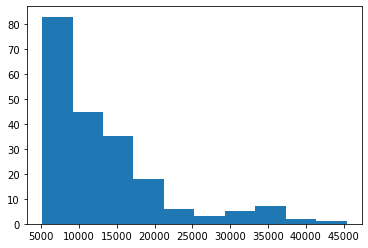

In [5]:
plt.hist(df["price"])
plt.show()

After visualizing our response variable price, we have found it to be right skewed. To meet the assumption of normality, we will log transform the response variable. To do this, we must import `numpy`

In [6]:
import numpy as np
from scipy import stats

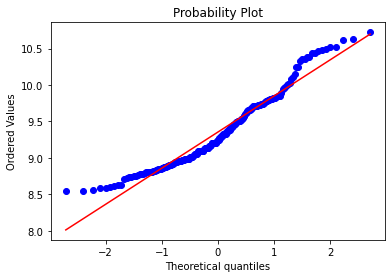

In [7]:
#plt.hist(np.log(df["price"]))
response = np.log(df["price"])
stats.probplot(response, plot=plt)
plt.show()

In [8]:
response = stats.boxcox(df["price"])
#print(response)

## Perform Box Cox

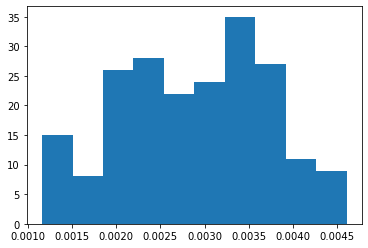

In [9]:
box_coxed_resp = np.power(df["price"], -0.63)
plt.hist(box_coxed_resp)
#plt.hist(np.power(df["price"], 1.58))
plt.show()

In [10]:
box_coxed_resp

0      0.002500
1      0.002203
2      0.002203
3      0.002449
4      0.002127
         ...   
200    0.002174
201    0.002013
202    0.001865
203    0.001813
204    0.001806
Name: price, Length: 205, dtype: float64

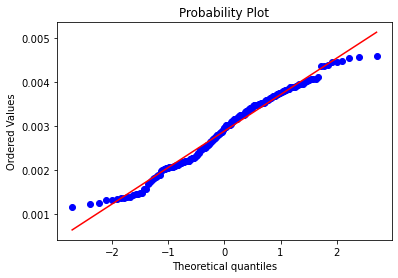

In [11]:
stats.probplot(box_coxed_resp, plot=plt)
plt.show()

In [12]:
# add new response to dataframe
df["bc_price"] = box_coxed_resp
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,bc_price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,0.002500
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,0.002203
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,0.002203
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,0.002449
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,0.002127


## Visualize Relationships

In [13]:
#import seaborn as zaineb
import seaborn as sns

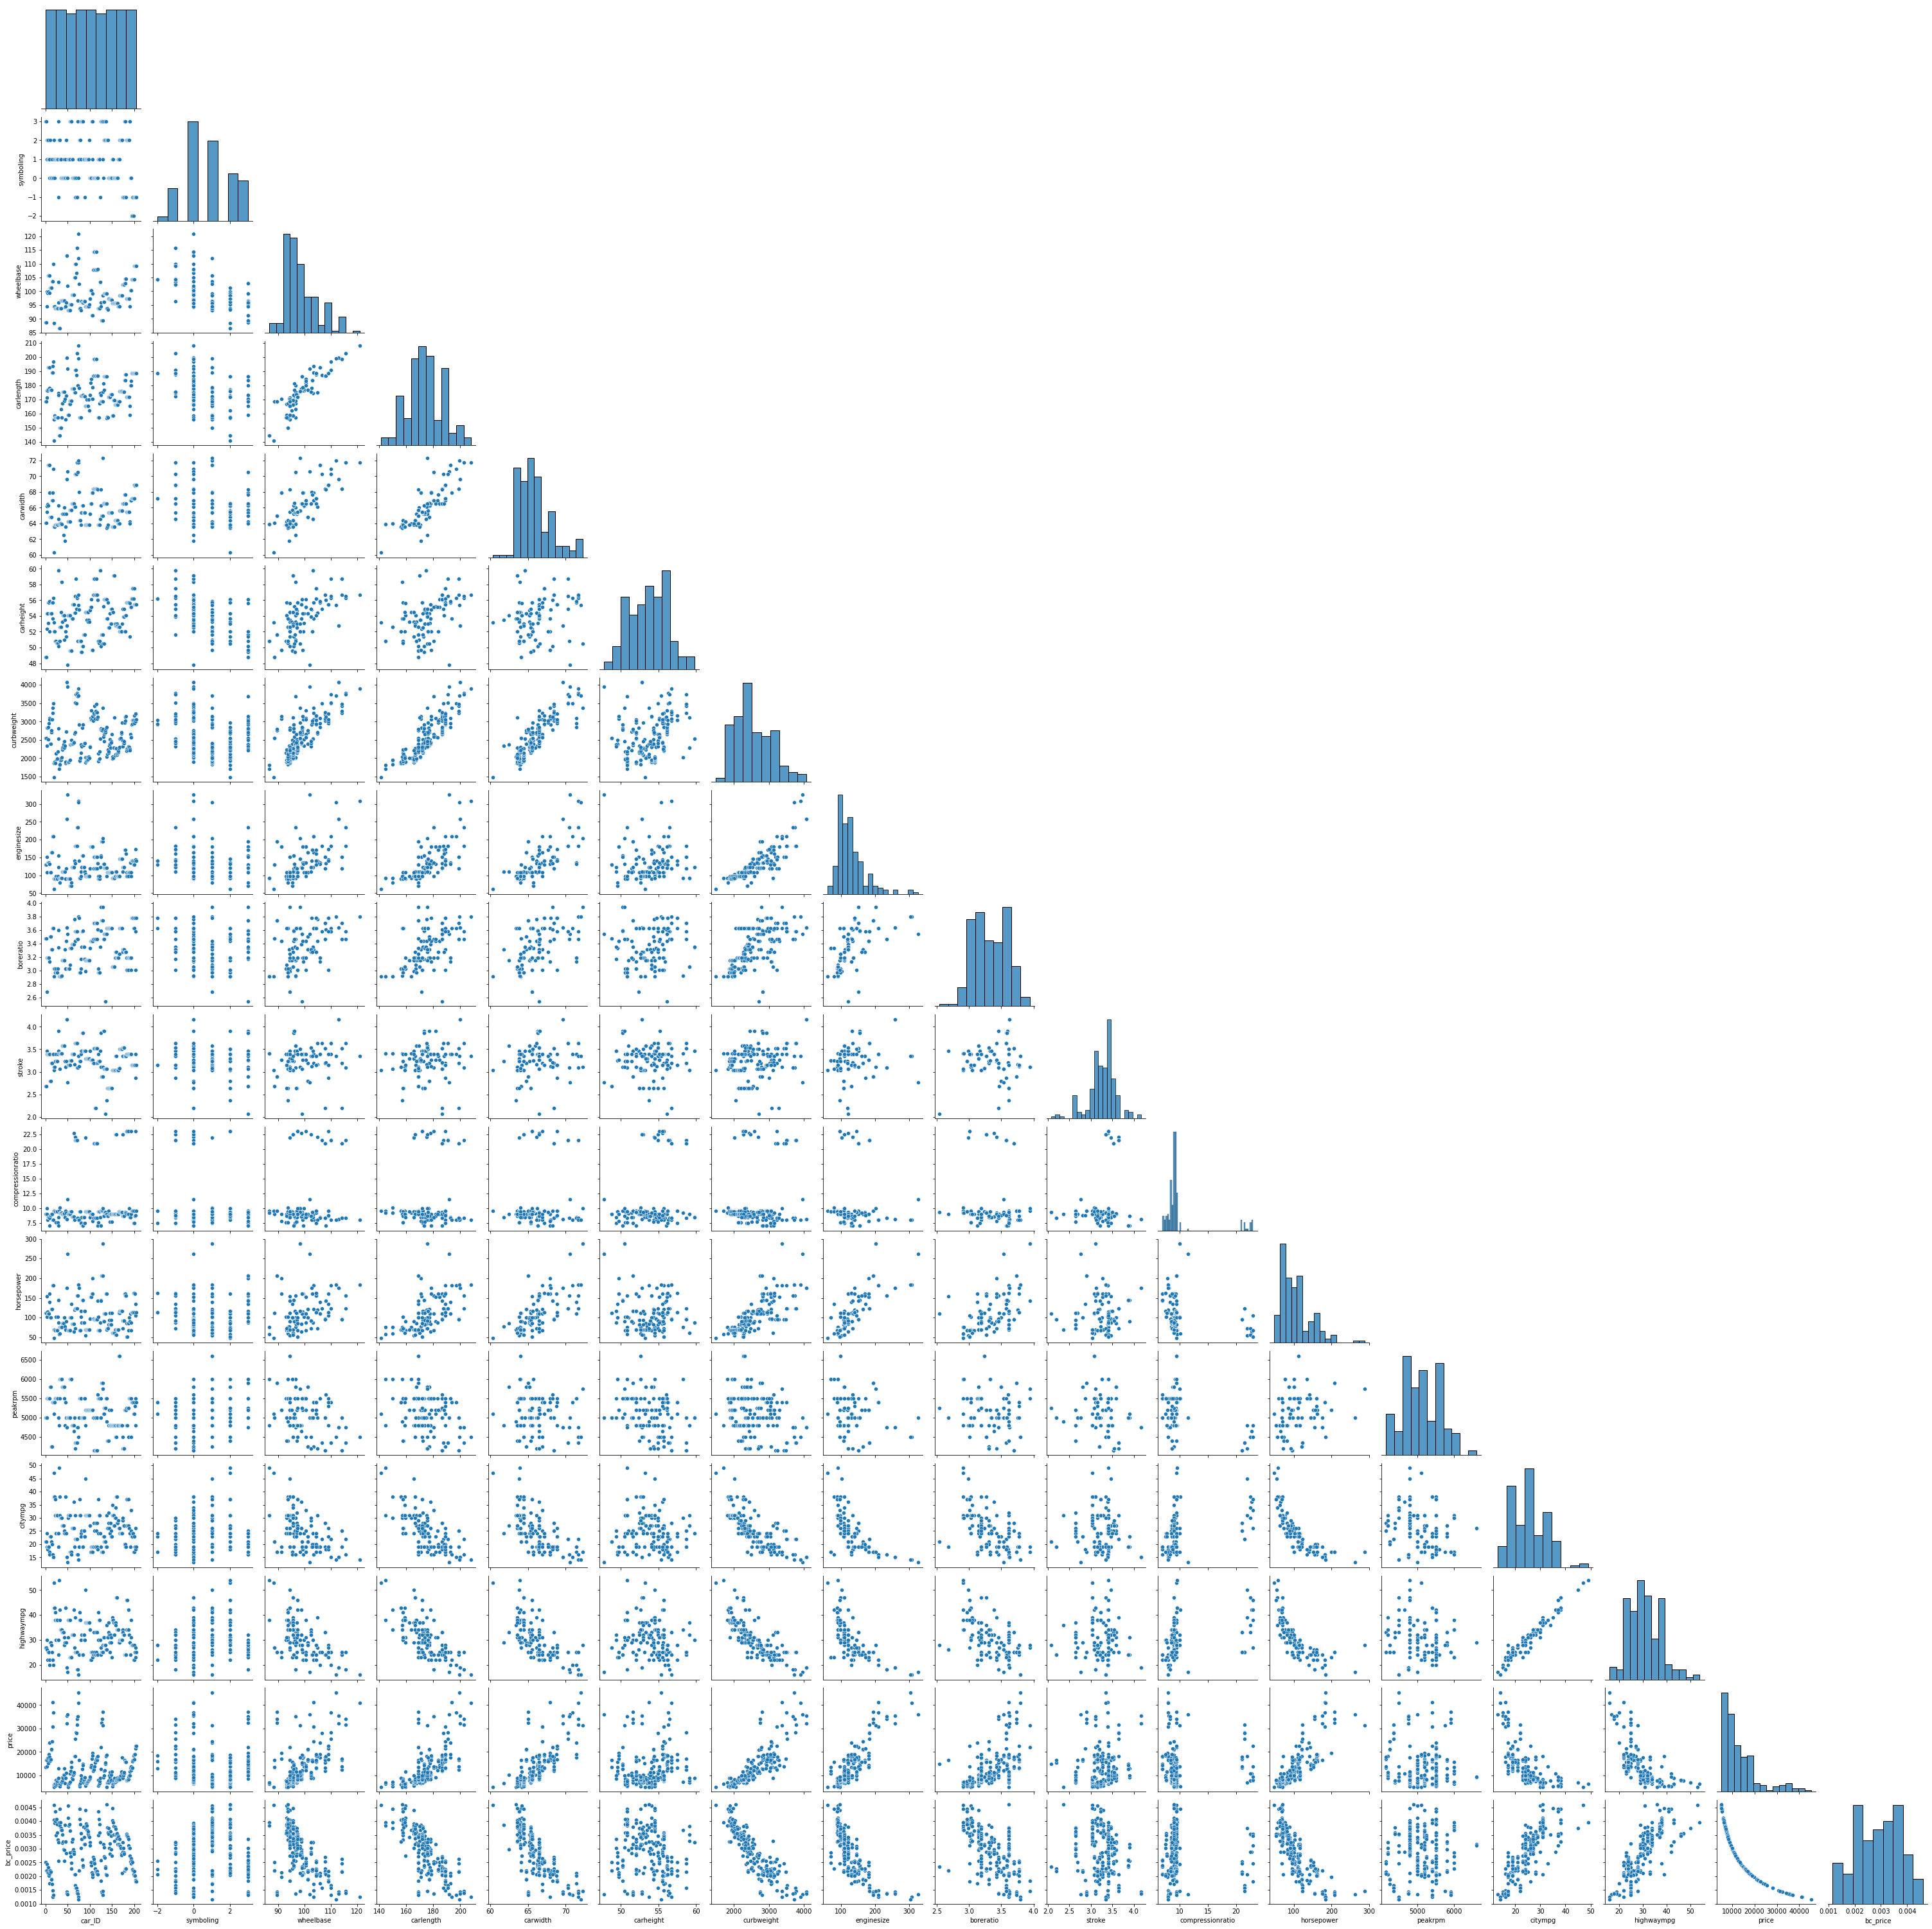

In [14]:
sns.pairplot(df, corner=True)
#sns.set(font_scale=6)
plt.show()

Car length, car width, curb weight, city mpg, highwaympg

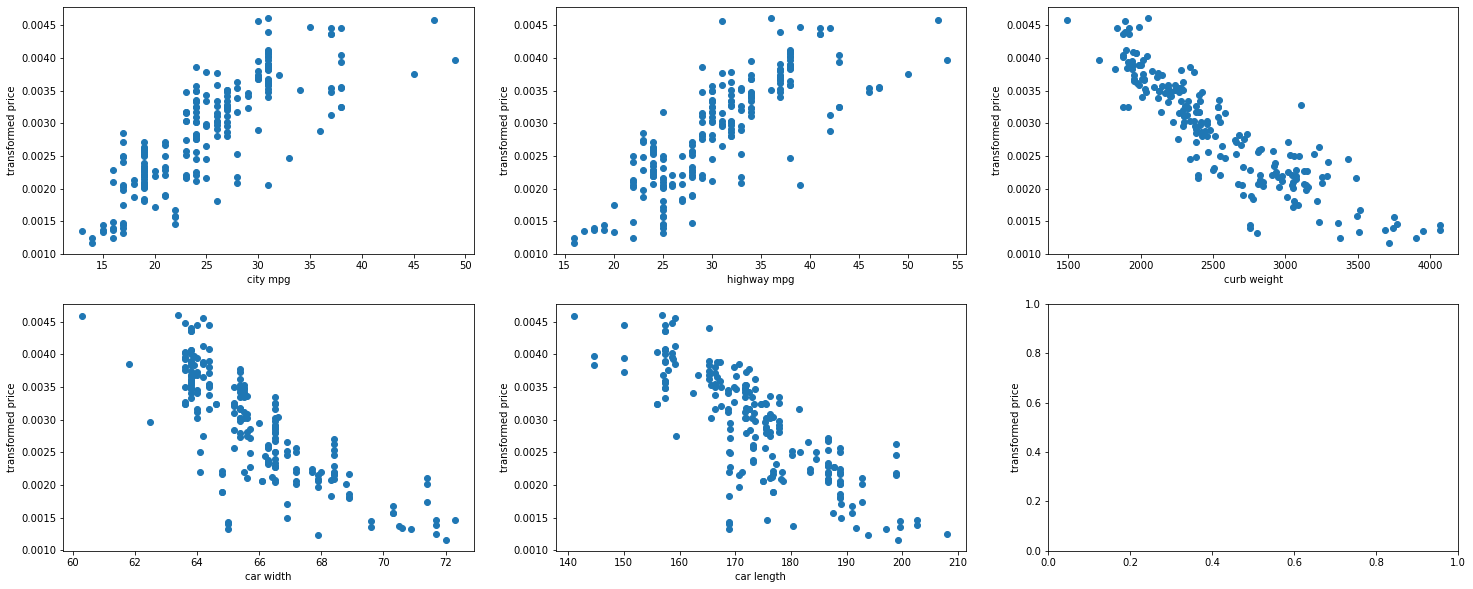

In [15]:
fig, axs = plt.subplots(2, 3, figsize=(25, 10))
axs[0, 0].scatter(x=df['citympg'], y=df['bc_price'])
axs[0, 0].set(xlabel="city mpg")
axs[0, 1].scatter(x=df['highwaympg'], y=df['bc_price'])
axs[0, 1].set(xlabel="highway mpg")
axs[0, 2].scatter(x=df['curbweight'], y=df['bc_price'])
axs[0, 2].set(xlabel="curb weight")
axs[1, 0].scatter(x=df['carwidth'], y=df['bc_price'])
axs[1, 0].set(xlabel="car width")
axs[1, 1].scatter(x=df['carlength'], y=df['bc_price'])
axs[1, 1].set(xlabel="car length")

for ax in axs.flat:
    ax.set(ylabel='transformed price')
    
plt.show()

## Correlation

In [31]:
df.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,bc_price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093,-0.001364
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978,0.091316
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816,-0.633691
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920,-0.791537
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325,-0.795067
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336,-0.181249
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305,-0.888321
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145,-0.779671
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173,-0.623701
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443,-0.112549


# Model Fitting

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [17]:
x = df.drop(["bc_price", "fuelsystem", "cylindernumber", "enginetype", "enginelocation", "drivewheel", 
             "carbody", "doornumber", "aspiration", "fueltype", "CarName", "car_ID", "symboling"], axis = 1)
y = df.filter(["bc_price"])

0.920353451591634

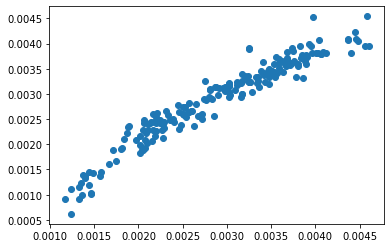

In [18]:
LR = LinearRegression()
fit_1 = LR.fit(x, y)
predict = fit_1.predict(x)
# plt.scatter(x["curbweight"], predict)
plt.scatter(y, predict)
R2 = r2_score(y,predict)
n = len(df)
p = len(x.columns)
a_r2 = 1-(1-R2)*(n-1)/(n-p-1)
a_r2

In [19]:
x = df.filter(["citympg", "highwaympg", "curbweight", "carwidth", "carlength"])

0.9239555567960324

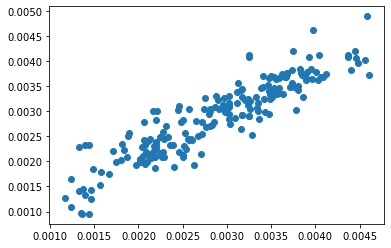

In [20]:
fit = LR.fit(x, y)
predict = fit.predict(x)
# plt.scatter(x["curbweight"], predict)
plt.scatter(y, predict)
r2_score(y,predict)
n = len(df)
p = len(x.columns)
a_r2 = 1-(1-R2)*(n-1)/(n-p-1)
a_r2
#fit.coef_

In [21]:
x = df.filter(["curbweight", "carwidth", "carlength"])

0.9247122179224401

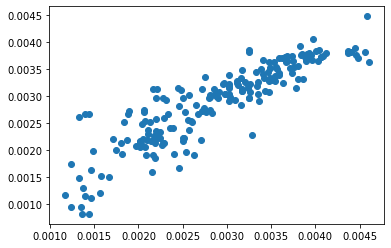

In [22]:
fit = LR.fit(x, y)
predict = fit.predict(x)
# plt.scatter(x["curbweight"], predict)
plt.scatter(y, predict)
r2_score(y,predict)
n = len(df)
p = len(x.columns)
a_r2 = 1-(1-R2)*(n-1)/(n-p-1)
a_r2

# Variance Inflation Factor

Variance Inflation Factor (VIF) is a measure for collinearity between variables. I guess Python is dumb so we have to use a library called `statmodel`.

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


vif_df = df.filter(["citympg", "highwaympg", "curbweight", "carwidth", "carlength", "bc_price"])
vif_df_constant = add_constant(vif_df)
vif_df_constant

vif = pd.Series([variance_inflation_factor(vif_df_constant.values, i) 
               for i in range(vif_df_constant.shape[1])], 
              index=vif_df_constant.columns)


vif
#variance_inflation_factor(vif_df, 5)

const         3561.503641
citympg         20.688254
highwaympg      22.201331
curbweight      10.121724
carwidth         4.629679
carlength        4.914497
bc_price         6.130471
dtype: float64

In [25]:
vif_df = df.filter(["curbweight", "carwidth", "carlength", "bc_price"])
vif_df_constant = add_constant(vif_df)
vif_df_constant

vif = pd.Series([variance_inflation_factor(vif_df_constant.values, i) 
               for i in range(vif_df_constant.shape[1])], 
              index=vif_df_constant.columns)


vif

const         3401.453968
curbweight       8.781251
carwidth         4.581581
carlength        4.909683
bc_price         4.800223
dtype: float64

In [23]:
## TODO: Outliers (pun intended)

# From Scratch :)

Let's try to do Multiple Linear Regression from scratch.

$$ \hat{\beta} = (X^{T}X)^{-1}X^{T}y$$

$ X $ denotes a matrix where each column in the matrix is a feature/column of our dataset. 

In [26]:
intercepts = np.ones((len(y), 1))
little_y = y.to_numpy()
big_x = np.append(x.to_numpy(), intercepts, axis=1)
big_x_transpose = np.transpose(big_x)
x_transpose_x = np.matmul(big_x_transpose, big_x)
inv_x_transpose_x = np.linalg.pinv(x_transpose_x)

In [27]:
print(big_x.shape, big_x_transpose.shape, x_transpose_x.shape, inv_x_transpose_x.shape)

(205, 4) (4, 205) (4, 4) (4, 4)


In [28]:
beta_hat = np.matmul(np.matmul(inv_x_transpose_x, big_x_transpose), little_y)

In [29]:
beta_hat

array([[-1.26205309e-06],
       [-3.64814786e-05],
       [-1.26022090e-06],
       [ 8.73786497e-03]])

In [30]:
sorted(fit.coef_)

[array([-1.26205309e-06, -3.64814786e-05, -1.26022090e-06])]